# Importing the raw data

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

In [13]:
file = './data_for_training2022-04-19.csv'
basedf = pd.read_csv(file, index_col=False)

basedf = basedf.reset_index()
#basedf

In [14]:
#Changing nan writer values to 'Unknown'

basedf['writer'] = basedf['writer'].replace(np.nan, 'Unknown')
#basedf

In [ ]:
writers = []
writers = basedf['writer'].unique()

for i in range(len(basedf['writer'])):
    writerindex = np.where(writers == basedf['writer'][i])
    basedf['writer'][i] = writerindex[0][0]

#basedf['writer']

Classification

In [20]:
Y=basedf['label'].values
Y=Y.astype('int')
X=basedf['sentencelabel'].values
X=X.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=30)
model.fit(X_train, Y_train)
prediction_test=model.predict(X_test)
print('Accuracy :',metrics.accuracy_score(Y_test,prediction_test))

Accuracy : 0.5276752767527675


Linear Regression: Author-Sentence truth

In [ ]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

Y=basedf['label'].values
Y=Y.astype('int')
X=basedf['writer'].values
X=X.reshape(-1,1)
plt.scatter(X,Y)
#plt.show()

In [ ]:
# #Checking writer index output
# basedf.to_csv('writerindex.csv', index=False)

# print(basedf)

Accuracy:  0.011376952645744898
0.4383400479314338
[0.01766559]


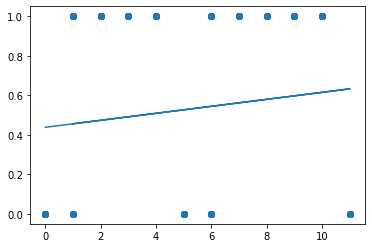

In [ ]:
model=LinearRegression()
model=model.fit(X,Y)
r_sq=model.score(X,Y)
print("Accuracy: ",r_sq)
b_0=model.intercept_
b_1=model.coef_
print(b_0)  
print(b_1)
regression_line=b_1*X+b_0
plt.scatter(X,Y)
plt.plot(X,regression_line)

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
Y=basedf['label'].values
Y=Y.astype('int')

# basedf.author[basedf.author=="Nagy Gábor"]=1
# basedf.author[basedf.author=="Ismeretlen"]=0

X=basedf[['label','writer']].values
logistic_regression=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)
confusion_matrix=pd.crosstab(Y_test,Y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix,annot=True)
print(metrics.accuracy_score(Y_test,Y_pred))